In [1]:
import os
from pathlib import Path
from functools import partial

import matplotlib.pyplot as plt

from src.datasets.cookie_ad import CookieAD
from src.preprocessing import InferencePreprocessing

In [2]:
cookie_dataset = partial(
    CookieAD,
    dataset_dir=Path(os.environ["COOKIE_DATASET_DIR"]),
    in_memory=False,
    sample_transform=InferencePreprocessing(
        target_img_width=int(os.environ["IMAGE_WIDTH"]),
        target_img_height=int(os.environ["IMAGE_HEIGHT"]),
    ),
)

ds_train = cookie_dataset(training_set=True)
ds_test = cookie_dataset(training_set=False)

print(f"Train Length: {len(ds_train)}")
print(f"Test Length: {len(ds_test)}")
print(f"Image Shape: {ds_train[0][0].shape}")


Train Length: 176
Test Length: 88
Image Shape: torch.Size([1, 128, 128])


torch.Size([1, 128, 128])
tensor(0)


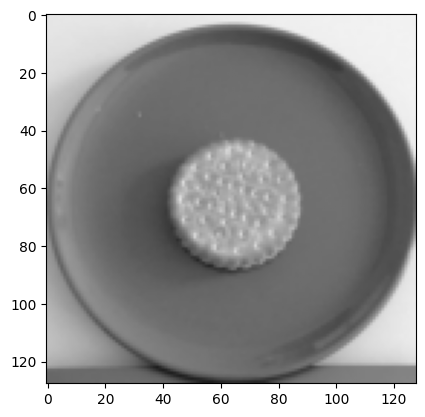

In [3]:
image, label = ds_test[0]
plt.imshow(image.movedim(0, -1), vmin=0, vmax=1, cmap="gray")
print(image.shape)
print(label)

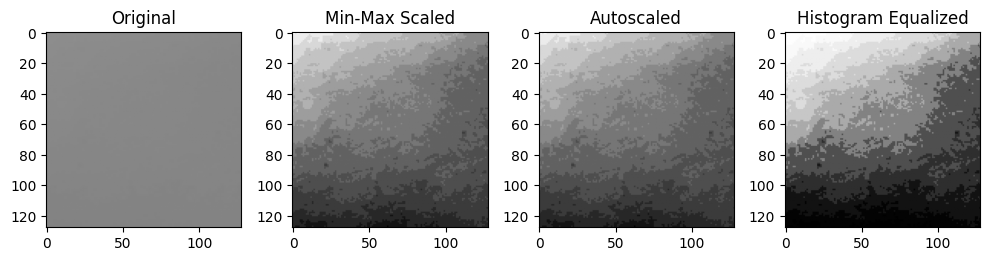

In [4]:
import os
import torch
import torchvision.transforms.v2 as transforms
from PIL import Image

preprocess = transforms.Compose([
    transforms.ToImage(),
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((int(os.environ["IMAGE_WIDTH"]), int(os.environ["IMAGE_HEIGHT"]))),
    transforms.ToDtype(dtype=torch.float32, scale=True),
])

with Image.open("/Users/juho/Downloads/white.png", "r") as image:
    img = preprocess(image.copy())

img_minmax = (img - img.min()) / (img.max() - img.min())
img_autocontrast = transforms.functional.autocontrast(img)
img_histogram_eq = transforms.functional.equalize((img * 255).to(torch.uint8)).to(torch.float32) / 255

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(10, 5), tight_layout=True)

def imshow(idx: int, data: torch.Tensor, title: str):
    axs[idx].imshow(data.movedim(0, -1), vmin=0, vmax=1, cmap="gray")
    axs[idx].set_title(title)

imshow(0, img, "Original")
imshow(1, img_minmax, "Min-Max Scaled")
imshow(2, img_autocontrast, "Autoscaled")
imshow(3, img_histogram_eq, "Histogram Equalized")